In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("Restaurant_Reviews.tsv")

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

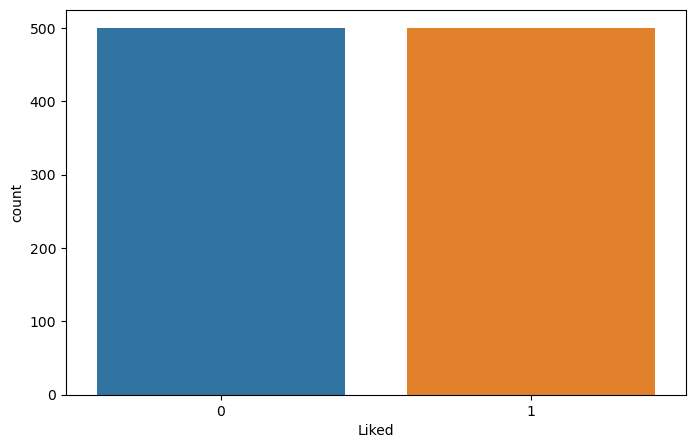

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [7]:
x=df['Review'].values
y=df['Liked'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [9]:
x_train.shape

(750,)

In [12]:
#Import countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [13]:
#Import Support Vector Classifier
from sklearn.svm import SVC
model1=SVC()

In [14]:
# Model 1: Pipeline with vectorization model
from sklearn.pipeline import make_pipeline 
model1 = make_pipeline(CountVectorizer(),SVC())

In [15]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [16]:
#Train the Model 
model1.fit(x_train,y_train) 

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [17]:
#Predict the Test Results
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [18]:
# Evaluate Model 1
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.792

In [19]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB() 

In [20]:
# Model 2: PIPELINE WITH MultinomialNB 
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),MultinomialNB())

In [21]:
model2.fit(x_train,y_train) 

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [23]:
# Evaluate Model 2
accuracy_score(y_pred2,y_test)

0.784

In [24]:
#Create a file for the best model to be used for predictions
import joblib
joblib.dump(model1,'Project')

['Project']

In [25]:
#Reloading the created joblib model for predictions 
text_model = joblib.load('Project')   
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [26]:
# Using joblib model to predict the output 
text_model.predict(["omg!!it was too spice and i asked you don't add too much "]) 

array([0], dtype=int64)

In [27]:
#pip install streamlit

In [28]:
import streamlit as st 

In [29]:
%%writefile app.py 
import streamlit as st 
import numpy as np 
import joblib
from PIL import Image
st.title("RESTAURANT REVIEWS ANALYSIS")
image = Image.open('/content/food.jpg')
st.image(image)
message_text = st.text_input("Enter a message for review analysis")
model = joblib.load('/content/Project')
result = model.predict([message_text])[0]
if st.button("Predict"): 
 if result == 0:
	  st.success('Negative Review')    
 else:
	   result == 1
	   st.success('Positive Review')       

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501